# Lista 5

## zadanie 1
Zaimplementuj generowanie próby trajektorii procesu Poissona na odcinku $[0, T]$ opierając się na znajomości rozkładu jego czasów oczekiwania.
1. Narysuj jego trajektorie.
2. Napisz algorytm obliczający wartości $N_t$, zweryfikuj, czy ma poprawny rozkład.

In [2]:
import numpy as np, math, matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
def gen_poiss(t, lam):
    wait = np.random.exponential(scale = 1/lam, size = t)
    wait = wait[wait<t]
    return np.cumsum(wait)

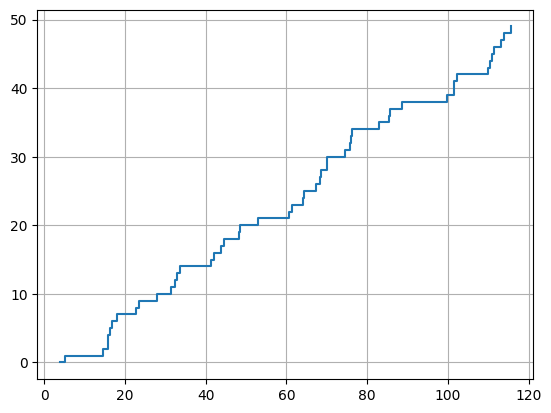

In [22]:
t = 50
lam = 0.5

p = gen_poiss(t, lam)

plt.step(p, range(len(p)), where='post')
# plt.plot(range(len(p)), p)
plt.grid(True)
plt.show()

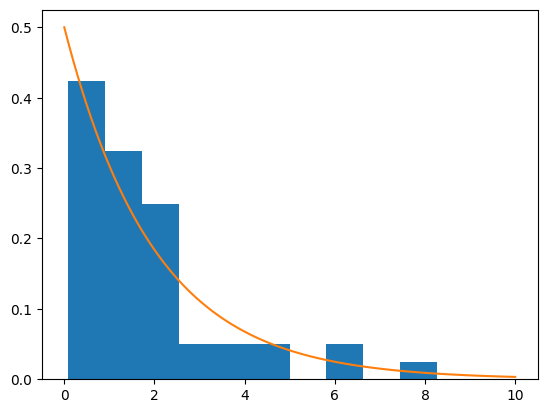

In [13]:
plt.hist(np.diff(p), density=True)
x=np.linspace(0,10,100)
plt.plot(x,expon.pdf(x, loc = 0, scale = 1/lam))

## zadanie 2
Zaimplementuj funkcję generującą trajektorie kompensowanego procesu
Poissona.

**Definicja** \
Niech $N_t$ będzie procesem Poissona z parametrem $λ > 0$. Kompensowanym procesem Poissona nazywamy proces $\widetilde N_t = N_t − λt$.


In [16]:
def compensated_poiss(t,lam):
    T = gen_poiss(t,lam)
    return [T[t] - lam*t for t in range(len(T))]

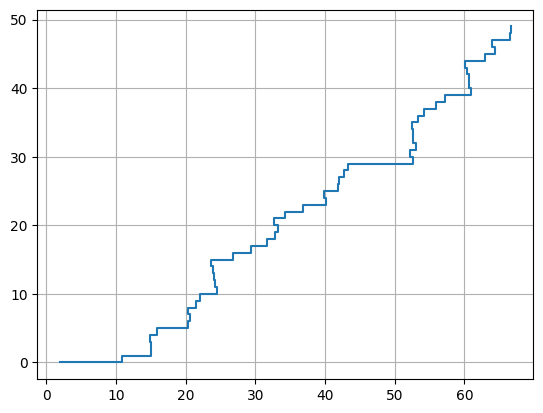

In [24]:
pcom = compensated_poiss(t, lam)

plt.step(pcom, range(len(pcom)), where='post')
plt.grid(True)
plt.show()